**Using the insurance dataset (insurance.csv) with adequate preprocessing steps,**

**Create a linear regression model**

In [ ]:
# Import necessary libraries
import numpy as np               # For numerical computations
import pandas as pd              # For handling datasets
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression     # For creating the linear regression model
from sklearn import datasets                          # To load a dataset
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the path to your dataset
file_path = '/content/drive/My Drive/Colab Notebooks/MCA306/DataSets/insurance.csv'

In [ ]:
# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to ensure it's loaded correctly
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# The needed preprocessing steps for this data

# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
# Example: Fill missing values in 'bmi' with the mean
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale numerical features (if necessary)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['age', 'bmi', 'children']] = scaler.fit_transform(data[['age', 'bmi', 'children']])

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Visualize the correlation among variables using a heatmap.**

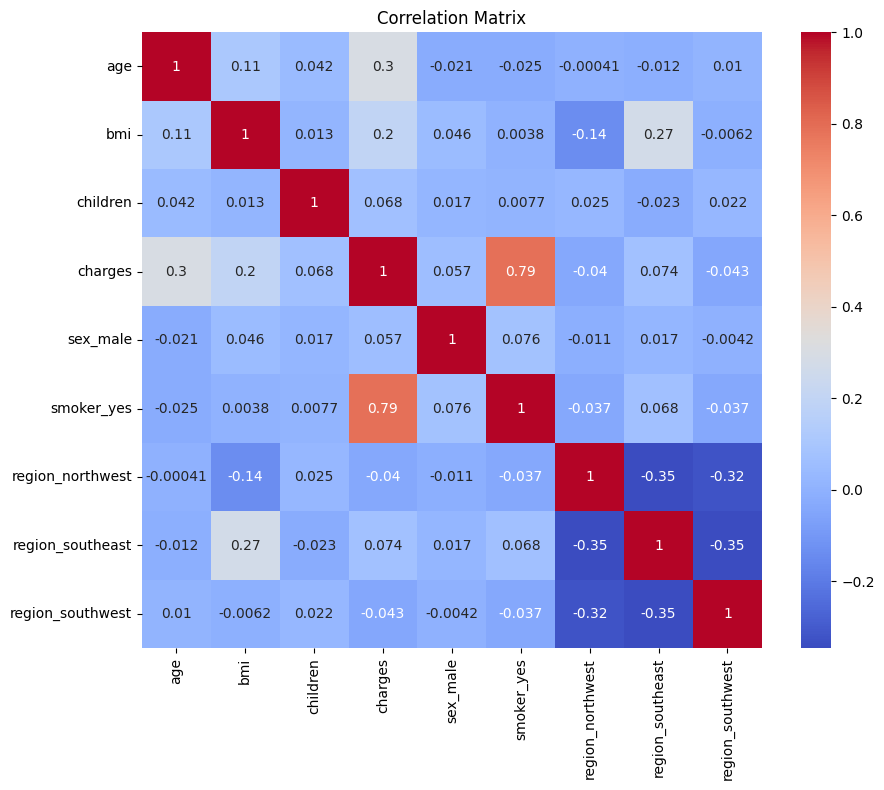

In [ ]:
# Visualize the correlation among variables using a heatmap.

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Evaluate the model.  (Find MSE and R_square.)**

Coefficients: [ 3.60914902e+03  2.05488506e+03  5.12478869e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Intercept: 8946.081982340915
Mean Squared Error: 33596915.851361476
R-squared: 0.7835929767120722


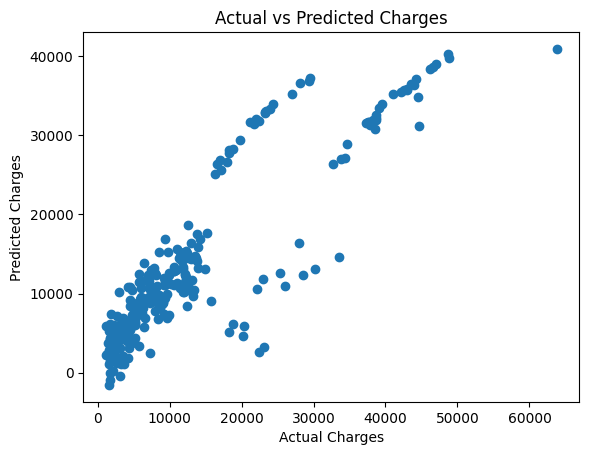

Prediction: [119647.04800136]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# create a ML model using Linear regression including the line of regression

# Separate features (X) and target variable (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Plot the regression line
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

# Make a prediction for a new data point
new_data = [[20, 1, 25, 0, 1, 0, 0, 0]]  # Example new data point
prediction = model.predict(new_data)
print('Prediction:', prediction)


**Predict the charges for a person with an age of 30, a BMI of 35,000, and who is a smoker.**


# **Based on the analysis of the insurance dataset using linear regression:**
- The model explains 78.36 % of the variance in insurance charges.
- Factors like age, BMI, and whether the person is a smoker significantly influence insurance costs.
- The model can be used to predict insurance charges for new individuals based on their characteristics.
- Further analysis could explore interactions between variables and investigate non-linear relationships.